In [8]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.9 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 3.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.7 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 4.7 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.5 MB 5.6 MB/s eta 0:00:07
   -- -------------------------

In [9]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Data

Total images: 1891
Labels distribution: [ 465 1426]


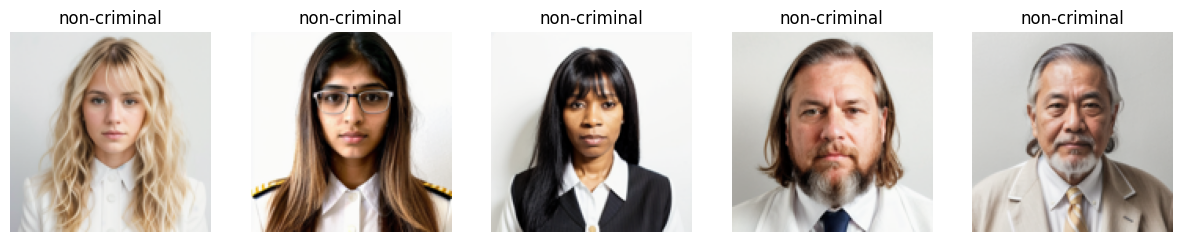

In [ ]:
# =========================
# Step 1: Import & Show Data
# =========================

data_dir = "data"
categories = ["criminal", "non-criminal"]

images = []
labels = []

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    for person_folder in os.listdir(category_path):
        person_path = os.path.join(category_path, person_folder)
        if os.path.isdir(person_path):
            for img_file in os.listdir(person_path):
                img_path = os.path.join(person_path, img_file)
                try:
                    img = Image.open(img_path).convert("RGB").resize((128,128))  # Resize for consistency
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Failed to load {img_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Total images: {len(images)}")

# criminal, non-criminal
print(f"Labels distribution: {np.bincount(labels)}")

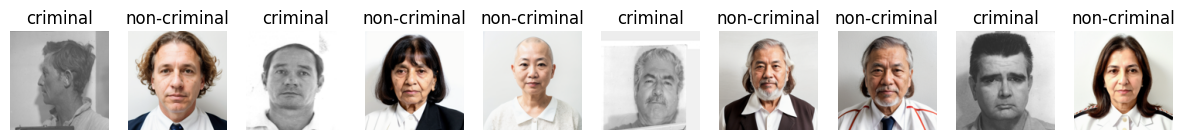

In [12]:
# Show sample images
def show_samples(images, labels, categories, n=10):
    plt.figure(figsize=(15,3))
    indices = np.random.choice(len(images), n, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.title(categories[labels[idx]])
        plt.axis("off")
    plt.show()

show_samples(images, labels, categories)

## Spliting Data

In [13]:
# =========================
# Step 2: Train/Test Split
# =========================

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1512, Test size: 379
